(start:numpy)=

# NumPy

## Lesson overview

[NumPy](https://numpy.org/) is the goto library to use when working with scientific data. With NumPy, we get access
to numerous numerical method tools that we can use on our data. At its core, NumPy handles data using arrays (think
matrices in math). These arrays are described with a "shape" parameter (i.e., how many dimensions the array takes up
and the size in each dimension), a "data type" parameter (i.e., what type of data can be stored in the array), and the
values that reside in the array. If you have a [MATLAB](https://www.mathworks.com/products/matlab.html) background,
is may sound similar to a matrix, and in fact NumPy is
[practically equivalent](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html) to MATLAB's numerical method
functionality. In this lesson, we will create NumPy arrays, checkout the different NumPy data types, learn how arrays
can be referenced and copied, and explore a few of the many methods and mathematical operations that NumPy provides.

## Creating a NumPy array

In order to use NumPy, we first need to import the `numpy` library into Python:

In [1]:
import numpy as np

This is a common way to import NumPy as we can cut down on keystrokes when accessing the library with `np` instead of
typing out `numpy`. Now we can create a NumPy array by passing a sequence, in this case a `list` object, to the NumPy
function [`np.array()`](https://numpy.org/doc/stable/reference/generated/numpy.array.html):

In [2]:
a = np.array([1, 2, 3])
print("type a:", type(a))
print("a:", a)

type a: <class 'numpy.ndarray'>
a: [1 2 3]


The `np.array([1, 2, 3])` call creates an object of type `numpy.ndarray`, the NumPy array. The NumPy array is the core
object type when working with NumPy. Almost all NumPy calculations or operations will be done using NumPy arrays.

We can check the number of dimensions an array takes up and the size of each dimension using the
[`.ndim`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.ndim.html) and the
[`.shape`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html) attributes, respectively:

In [3]:
print("a.ndim:", a.ndim)
print("a.shape:", a.shape)

a.ndim: 1
a.shape: (3,)


In this example, `a.ndim` returns the value `1`, meaning `a` is a one-dimensional array. Similarly, `a.shape`
returns `(3,)`, meaning this array has one dimension that is three elements long. The output notation for `a.shape`
looks odd at first glance because this attribute returns a `tuple` that reports the lengths of each dimension. Since
there is only one dimension in `a`, it returns the `tuple` object `(3,)`. If an array has more than one dimension,
you would see a sequence of numbers in the tuple.

We can redefine our array with multiple lists to add more dimensions:

In [4]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print("a.shape:", a.shape)
print("a:", a)

a.shape: (3, 4)
a: [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Now the shape of our array is `(3,4)`, meaning it is now a two-dimensional array with length `3` in one dimension
and `4` in the other dimension. In the above example we created an array with preexisting data, which was the list we
passed to `np.array()`. We can also create NumPy arrays without preexisting data a few different ways. For example, the
function [`np.zeros()`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) takes in the array shape
as an argument and returns an array of zeros. The example below creates a three-dimensional array of size (i.e., shape)
`(2, 3, 5)` that is filled with zeros:

In [5]:
a = np.zeros((2, 3, 5))      # Create an array of all zeros with shape (2, 3, 5)
print("a.shape:", a.shape)
print("a:", a)

a.shape: (2, 3, 5)
a: [[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]


There are several other NumPy functions that can create NumPy arrays by passing in a shape:

In [6]:
# Create an array of all ones with shape (2, 3, 5)
a = np.ones((2, 3, 5))     

# Create an uninitialized array with shape (2, 3, 5), the contents will be random values in memory
a = np.empty((2, 3, 5))    

# Create an array of a given value [42 in this case] with shape (2,3,5)
a = np.full((2, 3, 5), fill_value=42) 

Try running these functions to see what the array output looks like (i.e., use the `print()` function).

### Example: An array of random trignometry 

A [previous example](link:cosine) showed how to take the cosine of a random number using the `math` and `random` 
libraries. Building off this example, create a two-dimensional array using NumPy that stores five random values between 
0 - 2$\pi$ as well as their cosine. Have the first column in each row contain the random value and 
the second column in each row contain the cosine of that value.

---

Solution:

In order to solve the problem, we utilize both the NumPy `ones()` function and the `.shape` attribute. See the 
code block below for details. In short, the `ones()` function is first used to create a 2D NumPy array called `a` 
that has five columns and two rows. The ones are used as an initializer and will soon be replaced. The `for` loop 
contains the code that creates the random value and the cosine of that value. The `a.shape[0]` command pulls the row 
size of `a` into `range()`. While we could have hard coded the `for` command with `i in range(5)`, this would limit the 
use of the code block if we ever changed the size of `a`.

In [7]:
from random import random
from math import cos, pi
import numpy as np

a = np.ones((5,2))

for i in range(a.shape[0]):
    a[i,0] = random() * (2 * pi)
    a[i,1] = cos(a[i,0])

print(a)

[[ 6.23487181  0.99883313]
 [ 5.70041499  0.83494124]
 [ 5.99959348  0.96005662]
 [ 0.28212819  0.96046512]
 [ 4.70155529 -0.01083348]]


## Data types

In [*The Very Basics* lesson](start:numeric_types), we covered the numeric types that are built into the
standard library of Python: `int` (integers), `float` (floating point numbers), and `complex` (complex numbers). NumPy
has those data types and much more, giving you more control over the precision of the numbers in your array.
Every NumPy array is made of a single data type, which can be accessed with the
[`.dtype`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.dtype.html) attribute:

In [8]:
a = np.array([1, 2, 3])
print(a.dtype)

int64


Here, our NumPy data type is declared as `int.64`, meaning it is a 64-bit level integer. If not specified, the data
type for `np.array()` is inferred from the elements that make up the list. Because we passed a list entirely composed of
integers to `np.array()`, our data type is `np.int64`. If we add a `float` object to our list, we should see a
different data type for the array:

In [9]:
a = np.array([1, 2.2, 3])
print(a.dtype)

float64


Now, because our list includes a float, the inferred data type for the entire array is `np.float64`. It is a best
practice to declare the data type of your array, as it will make it obvious what data types you expect in
the array, including what data types you will expect from mathematical operations. For
example, we can try to change an element in a `np.int64` array to be a float:

In [10]:
a = np.array([1, 2 ,3])
print(a.dtype)         # Our numpy data type is inferred to be np.int64
a[0] = 11.5
print("a array:", a)

int64
a array: [11  2  3]


We can see that the float `11.5` became `11`, it was cast into a `np.int64` data type when assigned to the array.
We should never assume the data type based on the NumPy function. The example below shows that the `np.zeros()`
function creates an array of `np.float64` objects.

In [11]:
a = np.zeros((2,3 ,5 ))
print(a.dtype)

float64


The term `np.float64` stands for a "double precision floating point", a computer science phrase for specific type of
floating point number. This data type comes from the C programming language, which NumPy uses to quickly execute low
level numeric operations. Therefore, NumPy uses a C programming language "wrapper" for programming with Python. We can
use the `np.sctypes` command to show the available NumPy data types:

In [12]:
np.sctypes

{'int': [numpy.int8, numpy.int16, numpy.int32, numpy.int64],
 'uint': [numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64],
 'float': [numpy.float16, numpy.float32, numpy.float64, numpy.longdouble],
 'complex': [numpy.complex64, numpy.complex128, numpy.clongdouble],
 'others': [bool, object, bytes, str, numpy.void]}

Different [NumPy data types](https://numpy.org/doc/stable/user/basics.types.html)
will have different levels of precision and range. For instance, `np.int8` (also called `np.byte`)
can represent an 8-bit integer between -128 to 127 (8-bit = $2^8$ = 256 distinct values), while `np.int16` (also called
`np.short`) can represent a 16-bit integer between -32,768 to 32,767 (16-bit = $2^{16}$ = 65,536 distinct values).
Since the increase from `int8` to `int16` denotes the increased number of bits that are used
to represent a number, more bits mean bigger or more precise numbers. The list of available standard C data types
returned by `np.sctypes` can differ depending on your computer architecture (e.g., if your computer's operating
system is 32-bit or 64-bit).

Thankfully, we can specify the data type of the array with the argument `dtype`:

In [13]:
a = np.zeros((2, 3, 5), dtype=np.int16)
print(a.dtype)

int16


This results in `a` being a zeros array of data type `np.int16`.

### Keeping memory in mind

So why not use `np.float64` all the time since it can use 64 bits to represent very large integers and floats?
The thing to keep in mind when creating NumPy arrays is the memory footprint of the data types. A modern desktop or
laptop (circa 2023) has multiple gigabytes of random access memory (RAM; often colloquially called "computer memory")
available to store actively worked on data at one time. The amount of memory allocated for a NumPy array is dependent
on both the total number of "elements" (i.e, the number of discrete data values) in the array and the data type of the
array.

NumPy provides two useful array attributes to determine the total memory size for an array. The
[`.size`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.size.html) attribute reports the number of
elements present in an array and the
[`.itemsize`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.itemsize.html) attribute reports the
number of bytes used for each element (set by the data type). Therefore, the total memory allocated for a NumPy
array is `array.size * array.itemsize`.

The code block below demonstrates these concepts by calculating the amount of memory for a three element array
made up of 64-bit floating point values:

In [14]:
a = np.array([1.234, 2.12, -2343.3])
print("data type:", a.dtype)
print("size:", a.size)
print("element size:", a.itemsize)
print("number of bytes:", a.size * a.itemsize)

data type: float64
size: 3
element size: 8
number of bytes: 24


In this example, `a.size` returns `3` as the number of elements in `a` and `a.itemsize` shows that each element
makes up 8 bytes of RAM. This checks out, as `np.float64` takes up 64 bits and each byte is made of 8 bits, so 8
bytes equals 64 bits. By multiplying the memory requirements of the data type by the number of elements we find that
the memory footprint of the array is 24 bytes. While 24 bytes is not a big deal for a typical desktop (as of 2023) with
8 GB (i.e., 8000000000 bytes) of RAM, but you can imagine as we increase the dimensions of our array the memory
footprint can drastically increase. Let us run through the memory footprints of some data types for an array
of shape (100, 100, 100):

In [15]:
a = np.zeros((100, 100, 100), dtype=bool)
print("number of bytes:", a.size * a.itemsize)

number of bytes: 1000000


A `bool` array of shape (100, 100, 100) takes up 1000000 bytes, or 1 MB of RAM.

In [16]:
a = np.zeros((100, 100, 100), dtype=np.int16)
print("number of bytes:", a.size * a.itemsize)

number of bytes: 2000000


A `np.int16` array of shape (100, 100, 100) takes up 2000000 bytes, or 2 MB of RAM.

In [17]:
a = np.zeros((100, 100, 100), dtype=np.float32)
print("number of bytes:", a.size * a.itemsize)

number of bytes: 4000000


A `np.float32` array of shape (100, 100, 100) takes up 4000000 bytes, or 4 MB of RAM.

In [18]:
a = np.zeros((100, 100, 100), dtype=np.float64)
print("number of bytes:", a.size * a.itemsize)

number of bytes: 8000000


A `np.float64` array of shape (100, 100, 100) takes up 8000000 bytes, or 8 MB of RAM.
NumPy arrays with the exact same shape can take different amount of memory depending on their data type.
We should try to match the data type of our array to the actual type of data we are working with. For instance, if
we are working on a True and False table, we should use the `bool` data type instead of `np.float64`. If we are working
with floating point numbers, we can use `np.float64`. We do need to be mindful about the size and data type of the NumPy
arrays we create. For example, if we create an 10000 x 10000 x 10000 element array containing zeros represented in the
`np.float64` format we find the memory allocation to be:

In [19]:
a = np.zeros((10000, 10000, 10000), dtype=np.float64)
print("number of bytes:", a.size * a.itemsize)

MemoryError: Unable to allocate 7.28 TiB for an array with shape (10000, 10000, 10000) and data type float64

Unless you are on a massive super computer, you should have gotten a `MemoryError` exception when we tried to allocate
multiple terabytes of memory (1 TB = 1000 GB = 1,000,000,000,000 bytes!) to create the NumPy array. This demonstrates
how increasing the number of elements in an array can cause memory allocations problems.

### Array casting with `.astype()`

A useful function to use when mixing arrays of different data types is the
[`.astype()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html) method. With `.astype()` we
can [cast](start:casting) an array to a new data type:

In [20]:
a = np.array([1.234, 2.12, -2343.3], dtype=np.float64)
print("a data type:", a.dtype)
print("a array:", a)

b = a.astype(int)
print("b data type:", b.dtype)
print("b array:", b)

a data type: float64
a array: [ 1.2340e+00  2.1200e+00 -2.3433e+03]
b data type: int64
b array: [    1     2 -2343]


As seen in the example above, the original array, `a`, is constructed using a `np.float64` data type. We then
construct `b` by utilizing the `.astype()` method on `a` with the input argument `int`, meaning we
want to create `b` using the elements of `a` but now as `int` objects.

(link:referencing)=

## Referencing

Although NumPy arrays can look similar to lists, they are very much not the same. A big difference is the behavior when
we try to assign a variable to an existing NumPy array:

In [21]:
a = [1, 2, 3]
# create new list c from entire range of the list a
c = a[:]
c[0] = 10
print("list a:", a)
print("list c:", c)

a = np.array([1, 2, 3], dtype=np.float64)
# create new list c of entire range of the NumPy array a
c = a[:]
c[0] = 10
print("array a:", a)
print("array c:", c)

list a:

 [1, 2, 3]
list c: [10, 2, 3]
array a: [10.  2.  3.]
array c: [10.  2.  3.]


In both cases we assign the variable `c` to the entire range of `a` with the command `c = a[:]`. While this
creates a new `list` instance, it does not create a new NumPy array instance. Assigning an existing NumPy array to a
new variable will not create a new instance of that NumPy array, but rather it links the two arrays together.

However, we can first create copy of `a` using the
[`.copy()`](https://numpy.org/doc/stable/reference/generated/numpy.copy.html) method and then modify its contents to
separate the two arrays. This is done in the code block below:

In [22]:
a = np.array([1, 2, 3], dtype=np.float64)
# create copy of a for c
c = a.copy()
c[0] = 10
print("array a:", a)
print("array c:", c)

array a: [1. 2. 3.]
array c: [10.  2.  3.]


(link:NumPyIndexing)=
## Indexing

NumPy's arrays are both [zero indexed like the list class in Python](link:zeroPosition) and can be indexed by passing
the index number to the array using a set of brackets. The example below shows how we can specifically change the
(0, 0) position and the (2, 1) of a zeros array to 2 and 3, respectively, using index notations:

In [23]:
a = np.zeros((3, 3), dtype=np.int8)
# assign 2 to the first row, first column of the 2D array
a[0][0] = 2
# assign 3 to the third row, second column of the 2D array                
a[2][1] = 3
print("a array", a)

a array [[2 0 0]
 [0 0 0]
 [0 3 0]]


An array's shape can be used to loop through a multidimensional array to set a value at a particular index.
The example below loops through a 3 x 3 x 3 array and sets the first row of the first 2D matrix set to 2:

In [24]:
a = np.zeros((3, 3, 3), dtype=np.int8)

first_dim = a.shape[0]
sec_dim = a.shape[1]
third_dim = a.shape[2]

for i in range(first_dim):            # Loop through the first dimension
   for r in range(sec_dim):          # Loop through the second dimension
       for c in range(third_dim):    # Loop through the third dimension
           if i == 0 and r == 0:              
               a[i][r][c] = 2        # If we are in the "top row" of first dimension, assign 2 to that element

print("a array", a)

a array [[[2 2 2]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


There are easier ways to type out a range of indices of an array. For example, we can use the bracket-colon notation
`[:]` to include all the indices in the range of a specified dimension:

In [25]:
a = np.zeros((3, 3, 3), dtype=np.int8)
a[0][0][:] = 2
print("a array", a)

a array [[[2 2 2]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


This can also be expressed as a list of the form `[dimension, dimension, dimension]`:

In [26]:
a = np.zeros((3, 3, 3), dtype=np.int8)
a[0, 0, :] = 2
print("a array", a)

a array [[[2 2 2]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


For a multiple dimensional arrays, we can leave out a dimension in the indices list to assign a value to the left
out dimension:

In [27]:
a = np.zeros((3, 3, 3), dtype=np.int8)
a[0, 0] = 2
print("a array", a)

a array [[[2 2 2]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


Just to give a couple more examples of indexing of numpy arrays, if we want to set the value of the entire array to 2,
we can pass `[:]` to include all indices of all dimensions:

In [28]:
a = np.zeros((3, 3, 3), dtype=np.int8)
a[:] = 2
print("a array", a)

a array [[[2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]]]


Finally, if we want to set just the first column of the first dimension instead of the first row, we can put `:` in the
middle of the indices list:

In [29]:
a = np.zeros((3, 3, 3), dtype=np.int8)
a[0, :, 0] = 2
print("a array", a)

a array [[[2 0 0]
  [2 0 0]
  [2 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


## Reshaping arrays

We can also change the "shape" (i.e., the size and / or dimension ) a NumPy array. For example, let us create a one
dimensional (1D) array and reshape into having two dimensions (2D):

In [30]:
a = np.arange(0, 12, dtype=np.float64)     # Create 1D numpy array with elements from 0 up to 12
print("a array", a)
a = a.reshape(4, 3)                        # Reshape the array and reassign it to a
print("a array reshaped", a)

a array [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
a array reshaped [[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]]


This example first uses the [`np.arange()`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)
function, which is similar to the Python standard library built-in `range()` function, to create a 1D NumPy array.
This call for `np.arange()` includes a start point (`0`), an end point (`12`), and the data type (`np.float64`).
There are a few other optional arguments that can be passed when creating an array. Then we reshape the 1D array to
a 4 x 3 array using the [`.reshape()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html)
method which is part of any NumPy array object. This returns an array with the passed in shape, in this case `(4,3)`.

As a reminder about [NumPy array referencing](link:referencing), if we use the command `b = a.reshape(2, 6)`, we will
not create a new NumPy array instance for `b` from `a`. Rather, we will reference the same array:

In [31]:
b = a.reshape(2, 6)      # b still references the original array
b[0][0] = 23
print("a array", a)
print("b array", b)

a array [[23.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]]
b array [[23.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]]


As seen above, the first element for both `a` and `b` are now set to `23` because they are referencing the same array.
If we want a new array instance from the content of `a`, we need to use the `.copy()` method:

In [32]:
a = np.arange(0, 12, dtype=np.float64)        # Create 1D numpy array with elements from 0 up to 12
b = a.reshape(3, 4).copy()                    # Reshape and create a copy
b[0][0] = 23
print("a array", a)
print("b array", b)

a array [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
b array [[23.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]


When reshaping an array, you need to make sure the reshaped dimensions matches the number of elements from the
initial array. If not, you will end up with an error:

In [33]:
a = np.arange(0, 12, dtype=np.float64)
a = a.reshape(5, 5)

ValueError: cannot reshape array of size 12 into shape (5,5)

This example raises a `ValueError` because the 12 elements of the initial array can not fill out the requested reshape
size of 5 x 5.

As final example of matrix manipulation, let us demonstrate the
[`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) function which can
join arrays:

In [34]:
# Create an array with range 0 up to 10, reshape to (2, 5)
a = np.arange(0, 10, dtype=np.float64).reshape(2, 5)

# Create a random array of 10 floats, reshape to (2, 5)
b = np.random.random_sample(10).reshape(2, 5)

c = np.concatenate((a, b))

print("c array:", c)

c array: [[0.         1.         2.         3.         4.        ]
 [5.         6.         7.         8.         9.        ]
 [0.53100989 0.98915737 0.53292866 0.47692027 0.81254722]
 [0.17981765 0.64598302 0.24036733 0.07719387 0.05372775]]


Here we use `np.concatenate()` to join arrays `a` and `b` together to form array `c`. By default, `np.concatenate()`
will return a new array instance of the two arrays which are joined along the 0 axis. We can specify a different axis
if we want as well as the data type of the new array. If no `dtype` argument is passed into `np.concatenate()`, the
data type of the new array will match the highest precision array, in our example the concatenated array is of
type `np.float64`.

```{admonition} Hey! Listen!
:class: tip
Notice that in the example above we use another new NumPy function
[`np.random.random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html)
which takes in a size and returns an array of that size filled with float numbers between 0 and 1. This function is
useful in generating random numbers in an array.
```

## Array metrics: the `.max()`, `.min()`, `.mean()`, and `.std()` methods

Besides `.reshape()`, NumPy arrays have many other useful methods. For example, the
[`.max()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html) method will grab the largest
element in an array:

In [35]:
a = np.arange(0, 12, dtype=np.float64).reshape(4, 3)
print("a array", a)
# Get the max value from the array
print("Max element:", a.max())

a array [[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]]
Max element: 11.0


Passing the optional `axis` argument to `.max()` gets us the max element along a certain direction:

In [36]:
print("Max element along 0 axis:", a.max(axis = 0))

Max element along 0 axis: [ 9. 10. 11.]


We can also use [`.min()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.min.html) to get the
smallest element, [`.mean()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.mean.html) to get an
average, and [`.std()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.std.html) to
get the standard deviation. All three of these methods accept the optional axis argument as well:

In [37]:
print("Min element along 0 axis:", a.min(axis = 0))
print("Mean along 1 axis:", a.mean(axis = 1))
print("Standard deviation of entire array:", a.std())

Min element along 0 axis: [0. 1. 2.]
Mean along 1 axis: [ 1.  4.  7. 10.]
Standard deviation of entire array: 3.452052529534663


### Example: Analyzing data

The {download}`following data file<./example_data/blue_foil_transmission_spectrum.txt>` is an optical transmission 
dataset from a blue foil. The first column in the data file is the wavelength of light measured (units: nm) and the 
second column is the detected light intensity (units: counts). Data is tab-delimited and the first row of data is a 
header row that contains information about each column. 

Load this data file into Python and determine the average wavelength, the maximum wavelength, the minimum wavelength, 
and the standard deviation of wavelengths used in the measurement. Report all values with two digits of precision past 
the decimal point. See the tip below about importing the file into Python.

```{admonition} Hey! Listen!
:class: tip
Use the [`numpy.loadtxt()`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) function to load the 
data into the Python environment. We introduced this useful function in an [earlier lesson](link:numpy_loadtxt). The 
first row of the file contains header data, so you should use the 
`skiprow` argument to ignore the first row when importing. Also, the data rows are tab-delimited, so you should 
set the `delimiter` argument to `"\t"` (i.e., the [tab escape character](link:newline)) so Python can properly 
read the file. From here, you can separate out each column of data using concepts taught in the 
[indexing section of this lesson](link:NumPyIndexing).
```

---

Solution:

The importing of data can be tricky because you to correctly link the file path and also ensure that Python is not 
trying to read any header rows. As seen in the code below, the arguments `delimiter="\t"` and 
`skiprows=1` are needed in order to read the file. 

From here it is reasonably straightforward. We first separate the 
data file into two separate arrays for ease of use, and then use the `.mean()`, `.max()`, `.min()`, and `std()` 
methods to get the average wavelength, maximum wavelength, minimum wavelength, and standard deviation of wavelengths,
respectively. Comments have been added to the code for readability purposes.

In [38]:
# Load data
spectrum_data = np.loadtxt("./example_data/blue_foil_transmission_spectrum.txt",
                           delimiter="\t",
                           skiprows=1)

# Separate out data into two separate 1D arrays
wavelength = spectrum_data[:,0]
intensity = spectrum_data[:,1]

# Outputting values
print(f"The average wavelength is {wavelength.mean():.2f} nm.")
print(f"The maximum wavelength is {wavelength.max():.2f} nm.")
print(f"The minimum wavelength is {wavelength.min():.2f} nm.")
print(f"The standard deviation in the wavelengths is {wavelength.std():.2f} nm.")

The average wavelength is 653.60 nm.
The maximum wavelength is 1102.21 nm.
The minimum wavelength is 186.72 nm.
The standard deviation in the wavelengths is 264.66 nm.


---

## Mathematical operations

One key aspect of the NumPy library is performing mathematical operations on arrays. As such, NumPy provides
numerous scalar, elementwise, matrix, and linear algebra mathematical operations. Let us go over a few
examples for each of these operation classes.

(link:scalarMath)=

### Scalar operations

Scalar-based operations (i.e., performing a mathematical operation between a single number (e.g., 2, 3.5, 125.35)
and an array) utilizes the normal mathematical operators for `int`, `float`, and `complex` classes. In scalar-based
operations, the scalar is operated upon each element in the array separately. The example below demonstrates this on
a 3 x 3 two-dimensional array:

In [39]:
a = np.array([[1, 2, 3], [5, 6, 7], [8, 9, 10]], dtype=np.float64)
print("a")
print(a)
print("dimensions:", a.ndim)
print("shape:", a.shape)
print("\n")

print("a + 5:")
print(a + 5)

print("a - 4:")
print(a - 4)

print("a * 2:")
print(a * 2)

print("a / 3:")
print(a / 3)

a
[[ 1.  2.  3.]
 [ 5.  6.  7.]
 [ 8.  9. 10.]]
dimensions: 2
shape: (3, 3)


a + 5:
[[ 6.  7.  8.]
 [10. 11. 12.]
 [13. 14. 15.]]
a - 4:
[[-3. -2. -1.]
 [ 1.  2.  3.]
 [ 4.  5.  6.]]
a * 2:
[[ 2.  4.  6.]
 [10. 12. 14.]
 [16. 18. 20.]]
a / 3:
[[0.33333333 0.66666667 1.        ]
 [1.66666667 2.         2.33333333]
 [2.66666667 3.         3.33333333]]


However, be aware that if you are reassigning elements in an array based on mathematical operations,
the result will be cast to match the array's data type:

In [40]:
a = np.array((5, 11))
print("a[0] = a[0] / 2")
a[0] = a[0] / 2
print("array a")
print(a)
print(a.dtype)

a[0] = a[0] / 2
array a
[ 2 11]
int64


We can see that `a[0] = a[0] / 2` resulted in `a[0]` becoming 2 instead of `2.5`. That's because the data type of
`a` is `np.int64`, which was inferred from the list `(5,11)`, so assigning `a[0]` is similar to casting the result as an
integer `int(5 / 2)`. This can be avoided
if we declare our array to be of type `np.float64` if we are expecting the array to contain floats in the future.

### Elementwise operations

NumPy also performs elementwise mathematical operations (i.e., mathematical operations between corresponding elements
in two different arrays) using the [same mathematical operators used in scalar operations](link:scalarMath). The
example below shows elementwise operations on two 3 x 3 two-dimensional arrays.

In [41]:
a = np.array([[1, 2, 3], [5, 6, 7], [8, 9, 10]], dtype=np.float64)
b = 2 * np.ones((3, 3), dtype=np.float64)
print("a")
print(a)
print("b")
print(b)

print("a + b:")
print(a + b)

print("a * b:")
print(a * b)

print("a / b:")
print(a / b)

a
[[ 1.  2.  3.]
 [ 5.  6.  7.]
 [ 8.  9. 10.]]
b
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]
a + b:
[[ 3.  4.  5.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
a * b:
[[ 2.  4.  6.]
 [10. 12. 14.]
 [16. 18. 20.]]
a / b:
[[0.5 1.  1.5]
 [2.5 3.  3.5]
 [4.  4.5 5. ]]


It is important to stress that these operations are elementwise and not the traditional matrix mathematical
operations that one sees in linear algebra courses (e.g., matrix multiplication, dot product, etc.). NumPy has these
operations as well, and [we will cover them shortly](link:matrixMath)!

Interestingly, NumPy can also use elementwise operations on certain arrays that have different dimensions. For
example, the following code block below shows an elementwise operation between a 3 x 3 array and a 1 x 3 array:

In [42]:
a = np.array([[1, 2, 3], [5, 6, 7], [8, 9, 10]], dtype=np.float64)
b = 3 * np.array([1, 2, 3], dtype=np.float64)
print("a")
print(a)
print("b")
print(b)
print("a * b:")
print(a * b)

a
[[ 1.  2.  3.]
 [ 5.  6.  7.]
 [ 8.  9. 10.]]
b
[3. 6. 9.]
a * b:
[[ 3. 12. 27.]
 [15. 36. 63.]
 [24. 54. 90.]]


As seen above, NumPy appears to have "looped" the 1 x 3 array `b` three times over in order to complete the
elementwise operations needed. In the NumPy library is this called
[broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) and is very convenient as it prevents the
need to completely reshape arrays for simple elementwise operations. However, there are limits to what NumPy
can do for broadcasting and if it cannot broadcast the arrays properly you will get an
`ValueError: operands could not be broadcast together` exception.

(link:matrixMath)=

### Matrix operations

NumPy also provides the matrix mathematical operations you would expect to use when dealing with matrices. For
example, [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) is handled using the
[`matmul()`](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) function:

In [43]:
a = np.array((2, 3), dtype=np.float64)
b = np.array((5, 6), dtype=np.float64)
print("matrix multiplication of ab:")
print(np.matmul(a,b))

matrix multiplication of ab:
28.0


All normal matrix multiplication rules (e.g., proper matching of dimensions of the arrays) apply. As a shorthand to
`np.matmul()`, one can also use the `@` operator as a shorthand to `np.matmul()`:

In [44]:
a = np.array((2, 3), dtype=np.float64)
b = np.array((5, 6), dtype=np.float64)
print("a @ b")
print(a @ b)

a @ b
28.0


We can also take the dot product between two vectors (i.e., one-dimensional arrays) using the
[`np.dot()`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) function:

In [45]:
a = np.array((2, 3), dtype=np.float64)
b = np.array((5, 6), dtype=np.float64)
print("a dot b")
print(np.dot(a, b))

a dot b
28.0


NumPy also provides a `.dot()` method to calculate the dot product as well:

In [46]:
a = np.array((2, 3), dtype=np.float64)
b = np.array((5, 6), dtype=np.float64)
print("a dot b")
print(a.dot(b))

a dot b


28.0


The `np.dot()` function is also extended to multidimensional arrays and will calculate different values depending on
the shape of the arrays being operated on. It is highly recommended to
[read the documentation for details](https://numpy.org/doc/stable/reference/generated/numpy.dot.html).

NumPy provides a few different ways to [transpose](https://en.wikipedia.org/wiki/Transpose) an array. One can use
the function [`np.transpose()`](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html), the NumPy array
method [.transpose()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.transpose.html), or the NumPy
array attribute [.T](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html) to transpose a data array.
The code block below demonstrates all three methods:

In [47]:
a = np.array([[5, 6], [7, 8], [9, 10]])

print("a:")
print(a)
print("\n")

print("using transpose()")
print(np.transpose(a))
print("\n")

print("using .transpose()")
print(a.transpose())
print("\n")

print("using .T")
print(a.T)

a:
[[ 5  6]
 [ 7  8]
 [ 9 10]]


using transpose()
[[ 5  7  9]
 [ 6  8 10]]


using .transpose()
[[ 5  7  9]
 [ 6  8 10]]


using .T
[[ 5  7  9]
 [ 6  8 10]]


All three routes give the same correct answer. Both `np.transpose()` and `.transpose()` allow for an additional `axis`
argument to alter how the transpose operation works. The transpose of an array is very important operation not only
for linear algebra using matrices but also when plotting data. The example below demonstrates how the transpose
operation is used when plotting data.

#### Transpose example: plotting data

A common pattern when generating scientific data is a 2D array of timestamps and measurement data. Generally when
we load data from a file or record it from an instrument it will be in the format [[timestamp],[data]], or in NumPy
speak a (*data_length*, 2) shaped array. Let us see what happens when try to plot data from a NumPy array in this
format.

```{admonition} Hey! Listen!
:class: tip
In this example, we will use the Matplotlib visualization library to plot data. For now, just follow along with the
example. We will cover the basics of Matplotlib in an [upcoming lesson](matplotlib:basics).
```

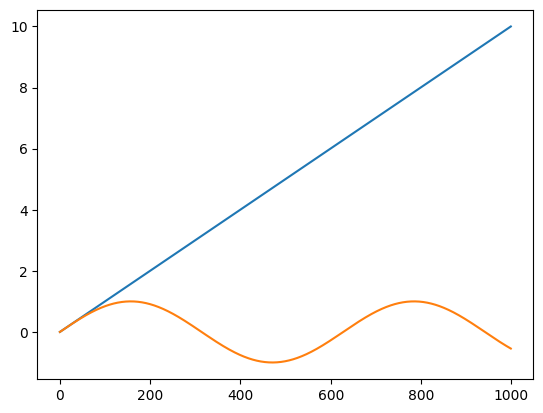

In [48]:
# import matplotlib for graphing later
from matplotlib import pyplot as plt

timestamps = np.linspace(0, 10, 1000)
data = np.empty((1000, 2))

# step through our timestamp with enumerate to get the current index (idx) and the current value (i)
# assign to data at the current index the two values, [timestamp, np.sin(timestamp]

for idx, i in enumerate(timestamps):
  data[idx] = [i, np.sin(i)]

# plot data?
plt.plot(data)
plt.show()

Before we explain what worked and what did not work with the code, let us walkthrough the code and go over the new
functions introduced in this example. First, we utilize the useful
[`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) function to
generate our timestamp array called `timestamps`. This function creates an evenly spaced set of numbers between a
starting value and an ending value. In the above example, the first argument is the starting value of `0`, the
second argument is the ending value of `10`, and the third argument is the number of evenly spaced values we want in
the array. In our example, `np.linspace()` creates a one-dimensional array of 1000 values
evenly spaced between 0 and 10.

Next, we use the function [`np.empty()`](https://numpy.org/doc/stable/reference/generated/numpy.empty.html) to
create an array called `data` that has a shape of (1000, 2) but with no values. This a common, and useful programming
technique as it helps with memory management.

Then in the `for` loop, we step through our timestamps and assign the values [timestamp, np.sin(timestamp)]
to `data`. The new function here is [`np.sin()`](https://numpy.org/doc/stable/reference/generated/numpy.sin.html),
which takes the sine of the input argument. In addition to numerous array-based operations, NumPy also provides many
additional [mathematical functions](https://numpy.org/doc/stable/reference/routines.math.html) that are useful for
scientific programming applications and worth exploring.

However, notice that when we plot the data we get two curves, a line that represents `timestamp` and a sine function
that is `np.sin(timestamp)`, that are both plotted with the wrong *x*-axis values. That is because `plt.plot()`,
which we'll discuss further in [Matplotlib Basics](matplotlib:basics) expects two arrays, one for *x* value and one
for *y* value for each data point. Since this is not provided, `plt.plot()` incorrectly assumes that we want both
`timestamp` and `np.sin(timestamp)` plotted, so it uses the row number as the *x* value.

To fix this issue, we first transpose our data array with `data.T` to change the shape from (1000,2) to (2,1000), and
then pass both rows separately into `plt.plot()`:

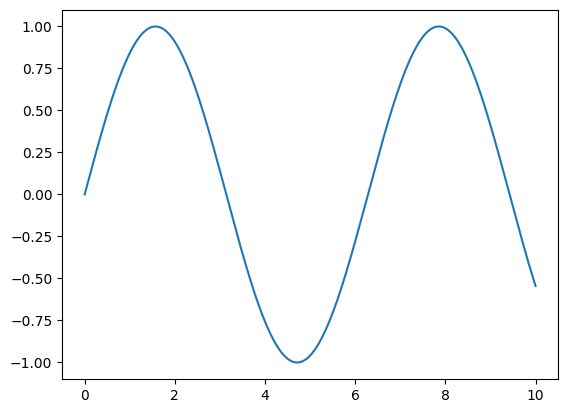

In [49]:
# transpose data, use first index for timestamp and second index which has data
plt.plot(data.T[0], data.T[1])

plt.show()

Now it works! We can simplify our code by issuing the transpose command when assigning values to `data`, which
allows us to remove the `for` loop:

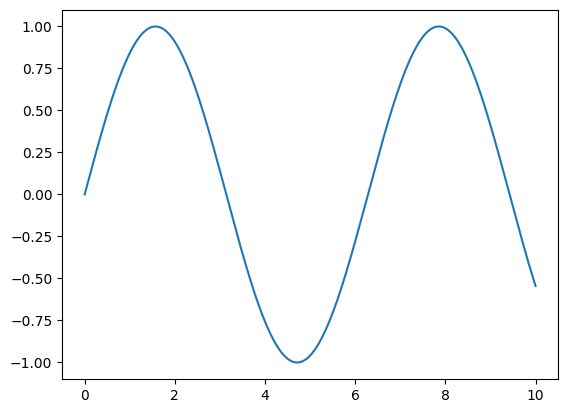

In [50]:
timestamps = np.linspace(0,10,1000)
data = np.empty((1000,2))

data.T[0] = timestamps
data.T[1] = np.sin(timestamps)

plt.plot(data.T[0], data.T[1])
plt.show()

### Linear algebra operations

In addition to providing many important scalar, elementwise, and matrix operations, NumPy also has an extensive list
of linear algebra operations. While these operations are more advanced than the scope of this document, you can
explore these operations in
[NumPy's linear algebra documentation page](https://numpy.org/doc/stable/reference/routines.linalg.html).

## Image demo and masking

Images are often used with NumPy because images ultimately are arrays of data. One common way to represent an image
is an array of shape (height, width) that represents the pixel size of the image. Each array entry then stores a
color value of an individual pixel value as a three element list in the format [red, green, blue] (i.e., the RGB
color format). Depending on the color scale of choice, each color value (i.e., a "channel") is assigned an integer value
bounded between 0 and a maximum value. One very popular color value scale is to assign each channel as an 8-bit integer
(i.e., bounded between 0 and 255). Since there are three color channels that are each represented as an 8-bit integer,
this is called a 24-bit (8 x 3) or RGB24 color scale.

Let us demonstrate how we can use NumPy to create and manipulate an image. The code block creates an 8 x 8 pixel
image of a smiley face using a 24-bit color scale:

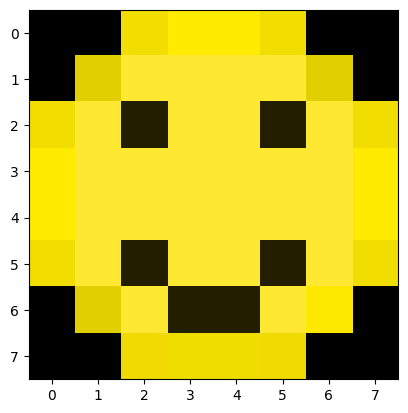

Smiley shape: (8, 8, 3)


In [51]:
# code assumes that numpy has already been imported
from matplotlib import pyplot as plt

smiley = np.array([[[0,0,0],[0,0,0],[241,222,0],[255,235,0],[255,235,0],[241,222,0],[0,0,0],[0,0,0]],
          [[0,0,0],[225,207,0],[255,232,50],[255,232,50],[255,232,50],[255,232,50],[225,207,0],[0,0,0]],
          [[241,222,0],[255,232,50],[34,31,0],[255,232,50],[255,232,50],[34,31,0],[255,232,50],[241,222,0]],
          [[255,235,0],[255,232,50],[255,232,50],[255,232,50],[255,232,50],[255,232,50],[255,232,50],[255,235,0]],
          [[255,235,0],[255,232,50],[255,232,50],[255,232,50],[255,232,50],[255,232,50],[255,232,50],[255,235,0]],
          [[241,222,0],[255,232,50],[34,31,0],[255,232,50],[255,232,50],[34,31,0],[255,232,50],[241,222,0]],
          [[0,0,0],[226,207,0],[255,232,50],[34,31,0],[34,31,0],[255,232,50],[253,232,0],[0,0,0]],
          [[0,0,0],[0,0,0],[239,219,0],[240,221,0],[240,221,0],[239,219,0],[0,0,0],[0,0,0]]], dtype=np.uint8)

plt.imshow(smiley)
plt.show()
print("Smiley shape:", smiley.shape)

While the array creation is a bit long and cumbersome, you should be able to see that each element gets assigned a
three element list with the datatype `np.uint8`, which is an "unsigned 8-bit integer" (i.e., integer value bounded
between 0 and 255). In NumPy speak, this means we have created a NumPy array of shape (8,8,3), which can be thought
of as a three-dimensional array that has a height of 8, a width of 8, and a depth of 3. We use the depth dimension
to store the 24-bit color value [red, green, blue].

We can manipulate our image using the `np.tranpose()` function from earlier but using additional arguments. For
example, let us transpose just the first and second dimensions ("axes"), leaving the third alone (the color values)
alone:

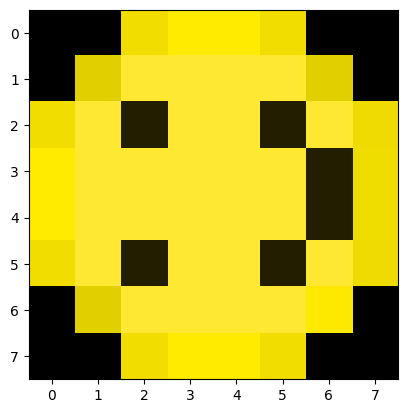

In [52]:
plt.imshow(np.transpose(smiley, axes=[1,0,2]))      # Transpose the 0 and 1 axes of the array
plt.show()

We can rotate the array by 90 degrees as well using the
[`np.rot90()`](https://numpy.org/doc/stable/reference/generated/numpy.rot90.html) function:

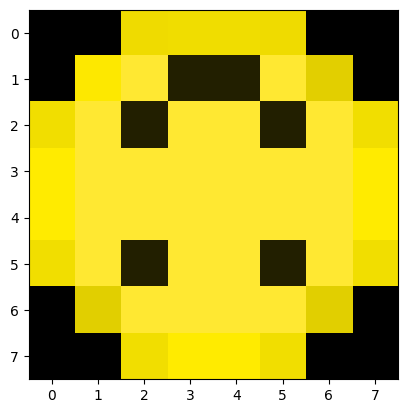

In [53]:
plt.imshow(np.rot90(smiley, 2))                     # Rotate the array 90 degrees two times
plt.show()

In the example above, we rotate our image by 90 degrees two times with the `2` positional argument.

Another common pattern when working with image data in NumPy is to create a `True`/`False` "mask" of an image
that corresponds to some color threshold:

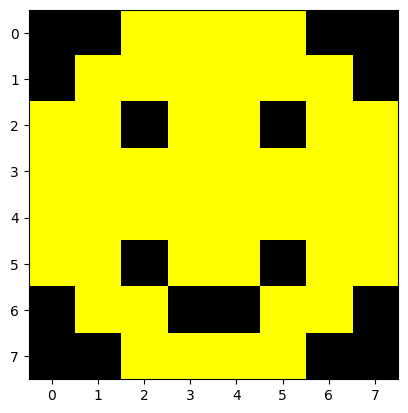

In [54]:
# Create a boolean array the same shape as smiley
mask = np.zeros(smiley.shape, dtype=bool)

# Where values in smiley are greater than 50, set mask to True
mask[smiley > 50] = True                  

# Create an empty array the same size as smiley
smiley_copy = np.empty(mask.shape, dtype = np.uint8)

# Where the mask is True, set the value to 255
smiley_copy[mask] = 255                
# Where the mask is False, set the value to 0
smiley_copy[~mask] = 0                  

plt.imshow(smiley_copy)
plt.show()

Here, we create a boolean mask of same size as our original image using `np.zeros()`, which defaults to
`False`. Darker pixels, like the shades of black, will all have very low values around 0. We then use the statement
`mask[smiley>50] = True` to set any element in `mask` to true if the original image's color value is greater than 50.

After this is done, we create the `smiley_copy` array that is empty but matches the size of `mask`. In the assignment
`smiley_copy[mask] = 255`, we set all elements in `smiley_copy` to 255 if `mask` has a corresponding value of `True`.
At first glance, the next commands, `smiley_copy[mask] = 255` and `smiley_copy[~mask] = 0`, look odd as they use the
`~` operator. The `~` tilde operator is a shorthand for
[np.invert()](https://numpy.org/doc/stable/reference/generated/numpy.invert.html),
which inverts our mask so `False` and `True` values switch. With that, we have created a mask of an image by
thresholding it against some color value, and then generate a new image based on that mask.

## Conclusion

The NumPy library is an extremely powerful and very popular mathematics focused Python library. For
scientific Python applications, NumPy is often the "goto" library of choice and is utilized in many other libraries.
Therefore, being proficient in NumPy will significantly improve your Python programming skills. As you continue your
Python development, it is highly recommended to look at the various online resources and documentation that is
available for this versatile library.

## Want to learn more?

[NumPy - Quickstart Guide](https://numpy.org/devdocs/user/quickstart.html)  
[NumPy - Tutorial](https://numpy.org/numpy-tutorials/index.html)  
[NumPy - Mathematical Functions](https://numpy.org/doc/stable/reference/routines.math.html)  
[NumPy - Data Types](https://numpy.org/doc/stable/user/basics.types.html)  
[NumPy - Scalar Data Types](https://numpy.org/doc/stable/reference/arrays.scalars.html)  
[NumPy - Array Class](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)  
[NumPy - Array Manipulation Operations](https://numpy.org/doc/stable/reference/routines.array-manipulation.html)  
[NumPy - Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)  
[NumPy - Linear Algebra](https://numpy.org/doc/stable/reference/routines.linalg.html)  
[100 Numpy Exercises - Nicolas P. Rougier](https://github.com/rougier/numpy-100)  
[iPython Cookbook - Cyrille Rossant](https://ipython-books.github.io/)  
[Floating Point Math - Erik Wiffin](https://0.30000000000000004.com/)